# Demo of pyTrackMateXML

In [1]:
from pathlib import Path
from trackmatexml import TrackmateXML
from matplotlib import pyplot as plt

Load the file

In [2]:
pth = Path(r'C:\mydemo.xml')
tmxml = TrackmateXML()
tmxml.loadfile(pth)
print(f"the tracknames:{tmxml.tracknames}")
print(" ")
print(f"the spotheader:{tmxml.spotheader}")

the tracknames:['Track_0', 'Track_3', 'Track_4', 'Track_5', 'Track_6', 'Track_7', 'Track_8', 'Track_9', 'Track_10', 'Track_11', 'Track_12', 'Track_13', 'Track_15', 'Track_16', 'Track_17', 'Track_19', 'Track_20', 'Track_21', 'Track_22', 'Track_23', 'Track_24', 'Track_25', 'Track_26', 'Track_27', 'Track_28', 'Track_29', 'Track_31', 'Track_32', 'Track_33', 'Track_34', 'Track_35', 'Track_36', 'Track_37', 'Track_38', 'Track_39', 'Track_40', 'Track_41', 'Track_42', 'Track_44', 'Track_45', 'Track_47', 'Track_48', 'Track_49', 'Track_50', 'Track_51', 'Track_53', 'Track_54', 'Track_55', 'Track_57', 'Track_58', 'Track_60', 'Track_61', 'Track_64', 'Track_65', 'Track_66', 'Track_67', 'Track_68', 'Track_69', 'Track_70', 'Track_71', 'Track_72', 'Track_74', 'Track_75', 'Track_76', 'Track_77', 'Track_78', 'Track_80', 'Track_81', 'Track_82', 'Track_83', 'Track_85', 'Track_88', 'Track_89', 'Track_90', 'Track_91', 'Track_92', 'Track_93', 'Track_94', 'Track_95', 'Track_96', 'Track_99', 'Track_100', 'Track_

Define the track and the property to plot

In [3]:
trackname = 'Track_0'
propertyname = 'MEAN_INTENSITY01'

Analyse the tracks to get the spotids that belong to the track.

`duplicate_split` will duplicate the history of the track at a split

`break_split` will break the track at a split

In [4]:
tracks = tmxml.analysetrack(trackname, duplicate_split=False, break_split=True)

Get intensities and frame numbers 

In [5]:
intensities = [tmxml.getproperty(track['spotids'], propertyname) for track in tracks]
frames = [tmxml.getproperty(track['spotids'], 'FRAME') for track in tracks]

Plot the result (`Child of 0` means it is has no parent.)

Text(0.5, 1.0, 'Track_0')

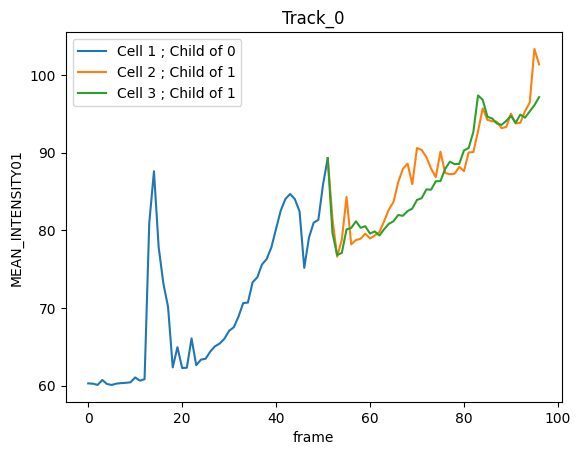

In [6]:
for i in range(len(frames)):
    plt.plot(frames[i], intensities[i], label='Cell ' + str(tracks[i]['cell']) + ' ; Child of '+str(tracks[i]['parent']))
plt.xlabel('frame')
plt.ylabel(propertyname)
plt.legend()
plt.title(trackname)

Plot tracks in subplots.

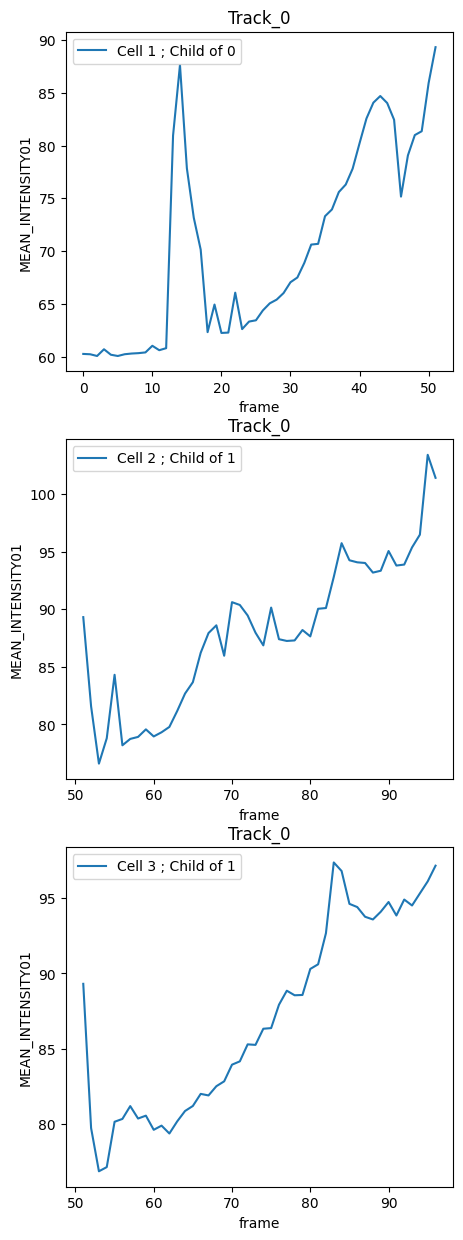

In [7]:
fig, axs = plt.subplots(len(frames),1)
fig.set_size_inches(5,15)
for i in range(len(frames)):
    axs[i].plot(frames[i], intensities[i], label='Cell ' + str(tracks[i]['cell']) + ' ; Child of '+str(tracks[i]['parent']))
    axs[i].set_xlabel('frame')
    axs[i].set_ylabel(propertyname)
    axs[i].legend()
    axs[i].set_title(trackname)